# SVM&I tests in simple problems

This notebook contains some experiments performed with our SVM&I implementation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

from lusi import SVM, SVM_I

In [3]:
SEED = 1997

## Toy datasets

In [4]:
def dataset_fixed_cov(n1=50, n2=50, b=np.array([1, 1])):
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    dim = 2
    np.random.seed(0)
    C = np.array([[0., -0.1], [0.5, .1]])
    X = np.r_[np.dot(np.random.randn(n1, dim), C),
              np.dot(np.random.randn(n2, dim), C) + b]
    y = np.hstack((np.zeros(n1), np.ones(n2)))
    return X, y

In [5]:
datasets = [dataset_fixed_cov(),
            dataset_fixed_cov(10,90, np.array([-0.2,0.2])),
            make_circles(noise=0.1, factor=0.5, random_state=SEED)]

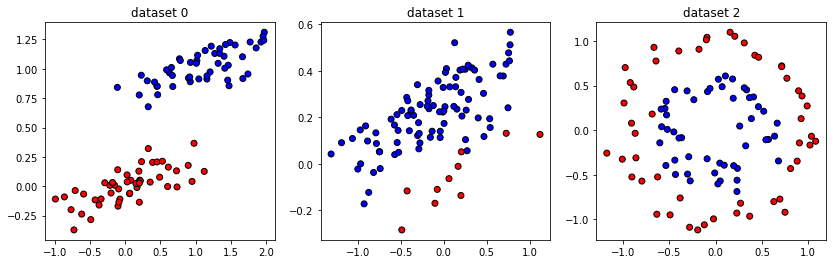

In [6]:
figure = plt.figure(figsize=(14,4))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i in range(len(datasets)):
    plt.subplot(1, 3, i+1)
    plt.title(f'dataset {i}')
    plt.scatter(datasets[i][0][:,0], datasets[i][0][:,1], c=datasets[i][1], cmap=cm_bright, edgecolors='k')

### Preprocessing the dataset

Here you can select the dataset to test (line 1).

Number of points: 100
Dimension: 2


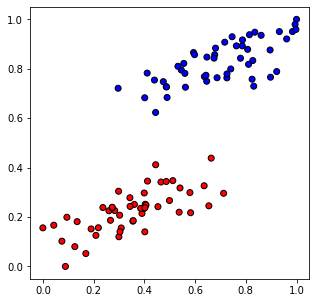

In [16]:
i = 0 # selects dataset
X, Y = datasets[i][0], datasets[i][1]

# scale data in range [0,1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# plot the dataset
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cm_bright, edgecolors='k')

# print some information
l = len(Y)
d = len(X[0])
print("Number of points:", l)
print("Dimension:", d)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=SEED)

## 1) Using SVC from sklearn

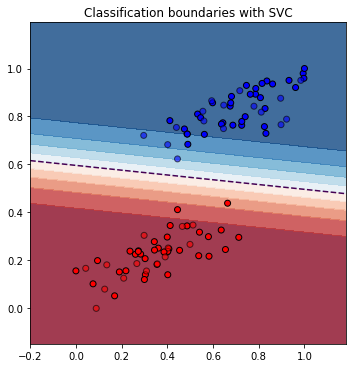


Accuracy: 1.0


In [17]:
# SVC from sklearn
svm = SVC(C=1, kernel='linear', gamma='auto', probability=True).fit(X_train,y_train)
# svm = SVC(C=100, kernel='rbf', gamma='auto', probability=True).fit(X_train,y_train)

# plot classification boundaries
h = .02
x_min, x_max = X_train[:, 0].min() - .2, X_train[:, 0].max() + .2
y_min, y_max = X_train[:, 1].min() - .2, X_train[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
viz=np.c_[xx.ravel(),yy.ravel()]
Z = svm.predict_proba(viz)[:,1]
Z = Z.reshape(xx.shape)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(5,5))
plt.contourf(xx, yy, Z, levels=np.linspace(0,1,11), cmap=cm, alpha=.8)
plt.contour(xx, yy, Z, levels=[0.5], linestyles='dashed')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.tight_layout()
plt.title("Classification boundaries with SVC")
plt.show()

print("\nAccuracy:", svm.score(X_test, y_test))

## 2) Using the SVM&I algorithm without predicates

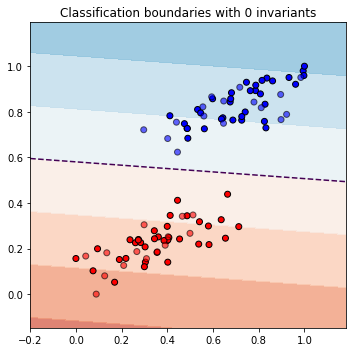

[ 0.86427189  0.81265509 -0.13367304  0.85639638  0.67021282  0.11404434
 -0.06694508  0.17207093  0.91266143 -0.02955771  0.23615406  0.82463596
  0.8837461   0.70988869 -0.01876239  0.06498399  0.59736207 -0.00216808
  0.96664231  0.76631234  0.2478659   0.02415433  0.14262191  0.01725402
  0.90596118  0.99043062  1.07130735  0.77962275 -0.24065492  0.92467779]

Accuracy: 1.0


In [28]:
# fit SVM classifier
clf = SVM(C=1, kernel='linear', gamma=0.5)
# clf = SVM(C=0.01, kernel='rbf', gamma=0.5)
clf.fit(X_train,y_train)

# plot classification boundaries
clf.plot_boundaries(X_train, y_train, X_test, y_test)

print(clf.decision_function(X_test))
print("\nAccuracy:", clf.score(X_test, y_test))

## 3) Using SVM&I algorithm

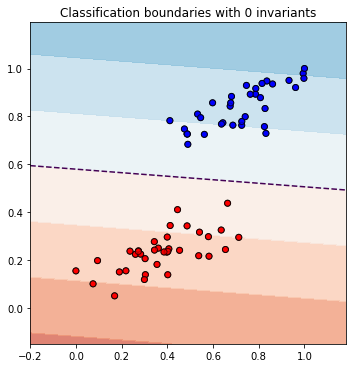

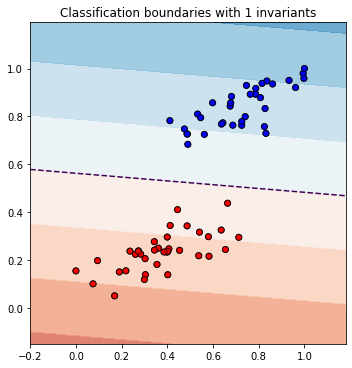

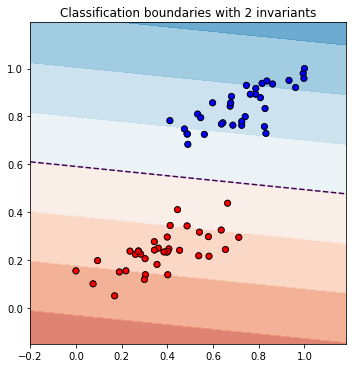

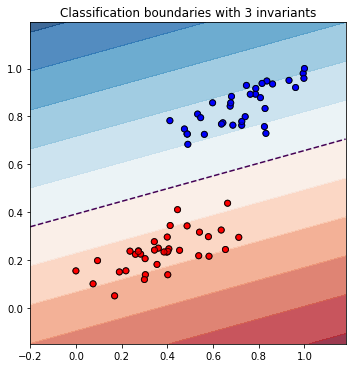

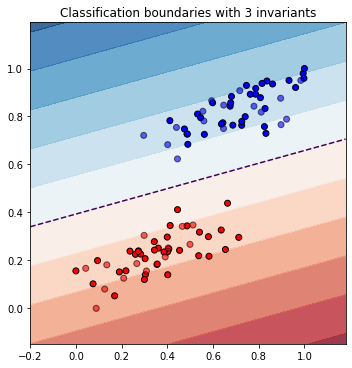

[ 1.02040859  0.94370289 -0.14050912  0.77991001  0.83876291  0.04059828
 -0.09694515  0.18957432  0.94982651  0.0605685   0.1767927   0.74961531
  0.88849162  0.96123714 -0.09031803 -0.02156575  0.7075284   0.042175
  0.95414042  0.95245724  0.16431804 -0.05844205  0.02175303 -0.01226572
  1.02310813  1.10011547  1.04886549  0.84266968 -0.27059395  1.08287364]

Accuracy: 1.0


In [29]:
clf = SVM_I(C=1, kernel='linear', gamma=0.5)
# clf = SVM_I(C=0.01, kernel='rbf', gamma=0.5)
clf.fit(X_train,y_train)
clf.plot_boundaries(X_train, y_train, X_test, y_test)

print(clf.decision_function(X_test))
print("\nAccuracy:", clf.score(X_test, y_test))

In [30]:
clf.Phi.shape # number of predicates used

(3, 70)